In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings('ignore')

In [7]:
ar = pd.read_csv('AirQuality.csv',sep=';')
ar

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# getting the numerical estimates of all the numerical column
ar.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


In [9]:
#Dropping CO(GT) and Unnamed columns
ar.drop(['CO(GT)','Unnamed: 15','Unnamed: 16'],axis = 1,inplace = True)

In [10]:
#Formatting some object columns from strings to floats

ar.replace(to_replace=',',value='.',regex=True,inplace=True) 

for i in 'C6H6(GT) T RH AH'.split():
    ar[i] = pd.to_numeric(ar[i],errors='coerce') 

In [11]:
#Replacing null data from -200 to NaN for posterior treatment

ar.replace(to_replace=-200,value=np.nan,inplace=True)

ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   PT08.S1(CO)    8991 non-null   float64
 3   NMHC(GT)       914 non-null    float64
 4   C6H6(GT)       8991 non-null   float64
 5   PT08.S2(NMHC)  8991 non-null   float64
 6   NOx(GT)        7718 non-null   float64
 7   PT08.S3(NOx)   8991 non-null   float64
 8   NO2(GT)        7715 non-null   float64
 9   PT08.S4(NO2)   8991 non-null   float64
 10  PT08.S5(O3)    8991 non-null   float64
 11  T              8991 non-null   float64
 12  RH             8991 non-null   float64
 13  AH             8991 non-null   float64
dtypes: float64(12), object(2)
memory usage: 1.0+ MB


In [8]:
#Formatting Date and Time to datetime type

ar['Date'] = pd.to_datetime(ar['Date'],dayfirst=True) 

ar['Time'] = pd.to_datetime(ar['Time'],format= '%H.%M.%S' ).dt.time

ar.head()

,Date,Time,PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [12]:
#Removing NMHC(GT) sensor due to amount of null values

ar.drop('NMHC(GT)', axis=1, inplace=True) 

ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   PT08.S1(CO)    8991 non-null   float64
 3   C6H6(GT)       8991 non-null   float64
 4   PT08.S2(NMHC)  8991 non-null   float64
 5   NOx(GT)        7718 non-null   float64
 6   PT08.S3(NOx)   8991 non-null   float64
 7   NO2(GT)        7715 non-null   float64
 8   PT08.S4(NO2)   8991 non-null   float64
 9   PT08.S5(O3)    8991 non-null   float64
 10  T              8991 non-null   float64
 11  RH             8991 non-null   float64
 12  AH             8991 non-null   float64
dtypes: float64(11), object(2)
memory usage: 962.0+ KB


In [16]:
ar.drop(['CO(GT)']  ,axis=1, inplace=True, errors = 'ignore')
ar.drop(['NOx(GT)'] ,axis=1, inplace=True, errors = 'ignore')
ar.drop(['C6H6(GT)'],axis=1, inplace=True, errors = 'ignore')
ar.drop(['NO2(GT)'] ,axis=1, inplace=True, errors = 'ignore')
ar.head()

,Date,Time,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888


In [17]:
ar = ar.dropna()
percent_NaN = []
columns = ar.columns
for col in columns:
    pNaN =  (ar[col].isna().sum()/ar.shape[0]) * 100 #sum NaN instances in each column. Divide by total rows
    percent_NaN.append(pNaN)
nan_percent_df = pd.DataFrame(percent_NaN,
                              index=columns,
                              columns=['%_NaN_in_Column']).sort_values('%_NaN_in_Column',ascending = False)
nan_percent_df

,%_NaN_in_Column
Date,0.0
Time,0.0
PT08.S1(CO),0.0
PT08.S2(NMHC),0.0
PT08.S3(NOx),0.0
PT08.S4(NO2),0.0
PT08.S5(O3),0.0
T,0.0
RH,0.0
AH,0.0


In [15]:
ar.info

<bound method DataFrame.info of             Date      Time  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  \
0     10/03/2004  18.00.00       1360.0      11.9         1046.0    166.0   
1     10/03/2004  19.00.00       1292.0       9.4          955.0    103.0   
2     10/03/2004  20.00.00       1402.0       9.0          939.0    131.0   
3     10/03/2004  21.00.00       1376.0       9.2          948.0    172.0   
4     10/03/2004  22.00.00       1272.0       6.5          836.0    131.0   
...          ...       ...          ...       ...            ...      ...   
9352  04/04/2005  10.00.00       1314.0      13.5         1101.0    472.0   
9353  04/04/2005  11.00.00       1163.0      11.4         1027.0    353.0   
9354  04/04/2005  12.00.00       1142.0      12.4         1063.0    293.0   
9355  04/04/2005  13.00.00       1003.0       9.5          961.0    235.0   
9356  04/04/2005  14.00.00       1071.0      11.9         1047.0    265.0   

      PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  

Index(['Date', 'Time', 'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
       'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv('AirQuality.csv',sep=";", decimal=",",header=0)

df.head()
df.drop(columns=['Unnamed: 15', 'Unnamed: 16'],inplace=True)
df.dropna(inplace=True)
df.replace(to_replace=-200,value=np.nan,inplace=True)

df.drop(columns=['NMHC(GT)'],inplace=True)
df.isna().sum()

df.drop(columns=['C6H6(GT)'],inplace=True)
df.drop(columns=['NOx(GT)'],inplace=True)
df.drop(columns=['NO2(GT)'],inplace=True)
df.drop(columns=['CO(GT)'],inplace=True)

In [50]:
col = ['PT08.S1(CO)','PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)','PT08.S5(O3)', 'T', 'RH', 'AH']
df = df[col]
df[col].dtypes
df.describe()


,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1099.833166,939.153376,835.493605,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,212.791672,261.560236,251.743954,339.367559,390.612324,8.657639,16.974801,0.395835
min,647.000000,383.000000,322.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,941.000000,743.000000,666.000000,1242.000000,742.000000,12.000000,36.600000,0.746100
50%,1075.000000,923.000000,818.000000,1456.264598,983.000000,18.300000,49.234201,1.015400
75%,1221.000000,1105.000000,960.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,2040.000000,2214.000000,2683.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


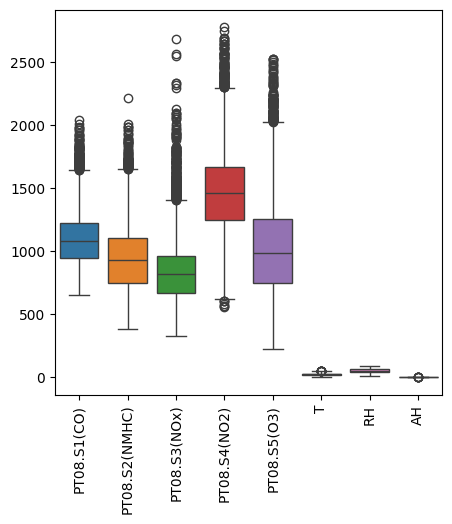

In [49]:
for i in col:
    df[i] = df[i].fillna(df[i].mean())
plt.figure(figsize=(5,5))
sns.boxplot(data=df)
plt.xticks(rotation='vertical')
plt.show()


In [51]:
# getting the quartile one and quartile 3 values of each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
# finally calculating the interquartile range IQR
IQR = Q3 - Q1
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

PT08.S1(CO)      145
PT08.S2(NMHC)     91
PT08.S3(NOx)     278
PT08.S4(NO2)     131
PT08.S5(O3)      131
T                 10
RH                 0
AH                 7
dtype: int64

In [52]:
mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
mask

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
9352,False,False,False,False,False,False,False,False
9353,False,False,False,False,False,False,False,False
9354,False,False,False,False,False,False,False,False
9355,False,False,False,False,False,False,False,False


In [53]:
# now replacing all the outliers using the median of that particular column
for i in mask.columns:
    df[i].astype('float')
    temp = df[i].median()
    df.loc[mask[i], i] = temp

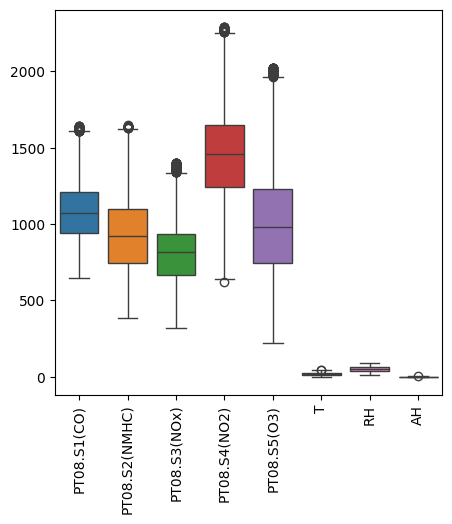

In [54]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df)
plt.xticks(rotation='vertical')
plt.show()

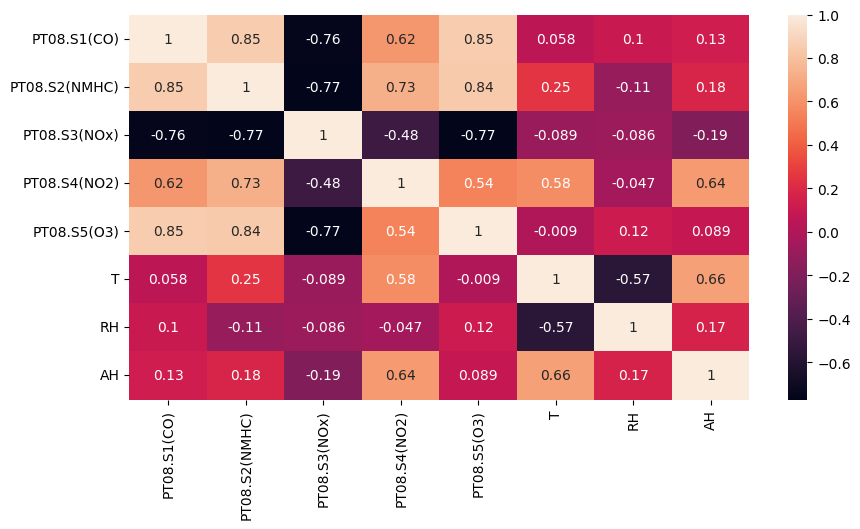

In [55]:
df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
## do pca and clustering here